# Smith Kaart Oefening 1

In [1]:
from cursusdef import *

## Oefening 1

Pas aan de hand van een Smith kaart om een antenne van 128 Ohm aan aan een striplijn printbaan van 50 Ohm voor een frequentie van 1.2 GHz ($\lambda$= 12.5 cm; $\epsilon_{r}$=4). Doe dit door een condensator in parallel op de 50 Ohm lijn te plaatsen. Waar moet deze condensator staan en hoe groot moet deze zijn? Wanneer 250 mW naar deze antenne gestuurd wordt, hoe groot is dan de maximale spanning aan de voet van de antenne? Hoe groot is de maximale spanning op de plaats waar de condensator is aangesloten?

### deel A: Bijplaatsen van een capaciteit in parallel

Om uiteindelijk een impedantie van 50 Ohm te bekomen, moet de parallel schakeling van het laatste stuk van de coax kabel met de bij te plaatsen condensator een uiteindelijke [admittantie](https://nl.wikipedia.org/wiki/Admittantie) van 20 mS opleveren. 

We plaatsen $\frac{Z_L}{Z_0}=2.56$ op de Smith kaart en we zoeken waar we de y=1 cirkel snijden in het bovenste deel van de kaart.

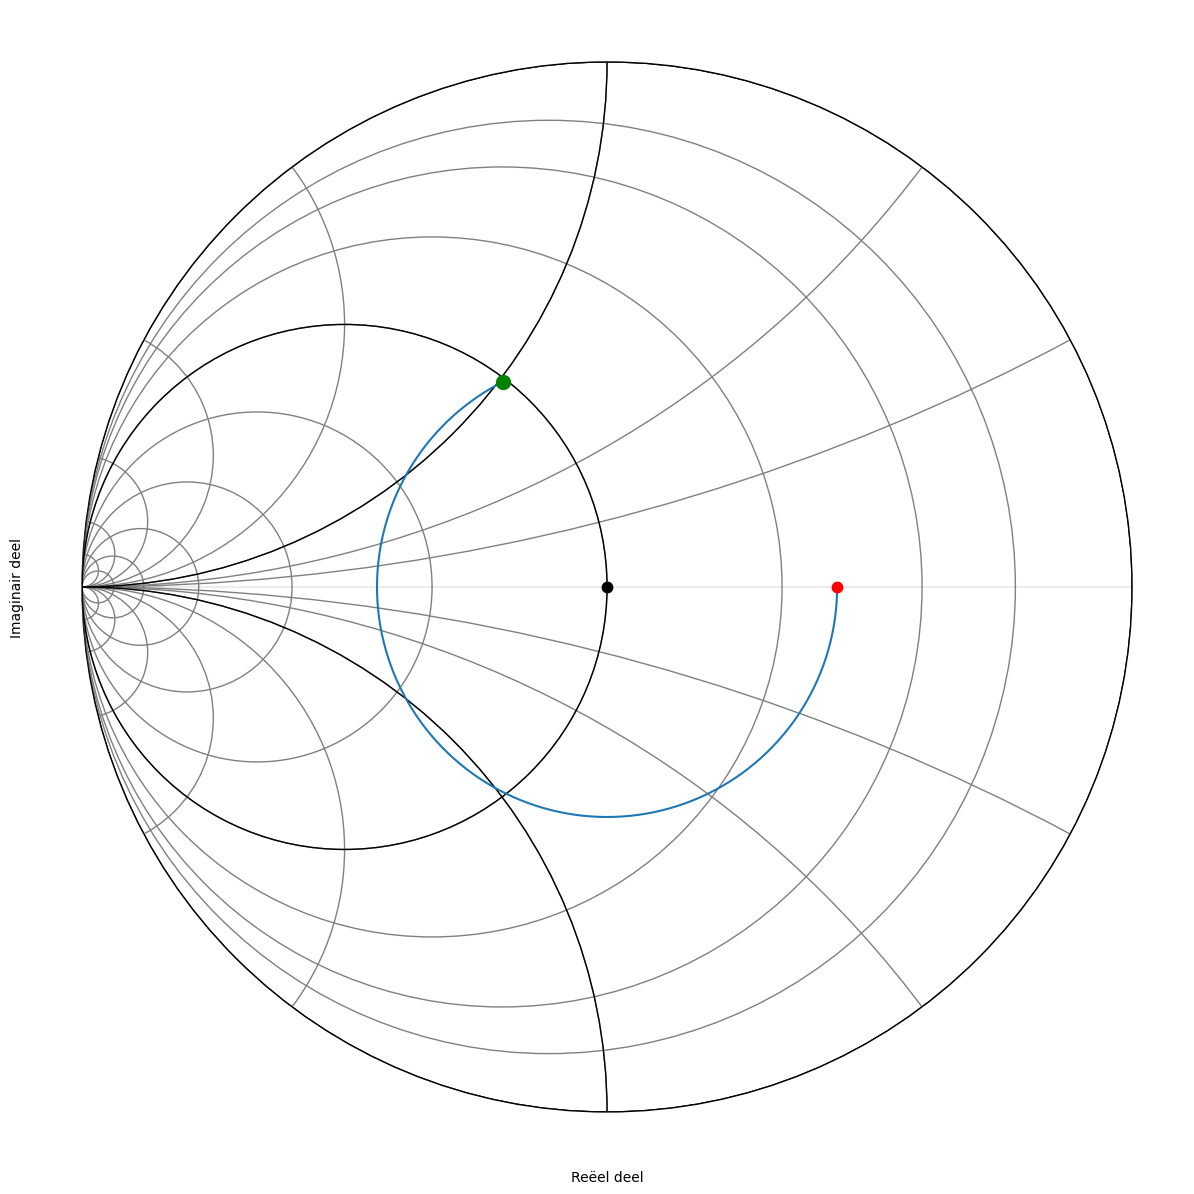

In [5]:
Z_L = 128
Z_0 = 50
f_0_str = '1.2GHz'
freq = rf.Frequency(start=1.1, stop=1.3, npoints=51, unit='GHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,244)]
def smitplot(zlijn,Z_0,tt='z',show=False):
    gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
    fig,ax=plt.subplots(figsize=(15,15))
    if show:
        ax.imshow(plt.imread('images/smithchart.png'), extent=[-1.185, 1.14, -1.13, 1.155])
    rf.plotting.plot_smith(gamma, chart_type=tt, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
    ax.plot([0],[0], marker=".",color='black', markersize=15)
smitplot(zlijn,Z_0,tt='y')

Echter de cirkels van constante admittantie staan niet op de klassieke Smith kaart, aangezien deze dan veel te druk wordt. Maar we weten dat deze cirkels steeds het spiegelbeeld zijn van de cirkels van constante impedantie. We kunnen dan ook als vertrekpunt het spiegelbeeld nemen van de cirkel uit {numref}`smith11`. Het resultaat zien we in {numref}`smith12`. {numref}`smith12b` toont dezelfde grafiek zonder de achtergrond.

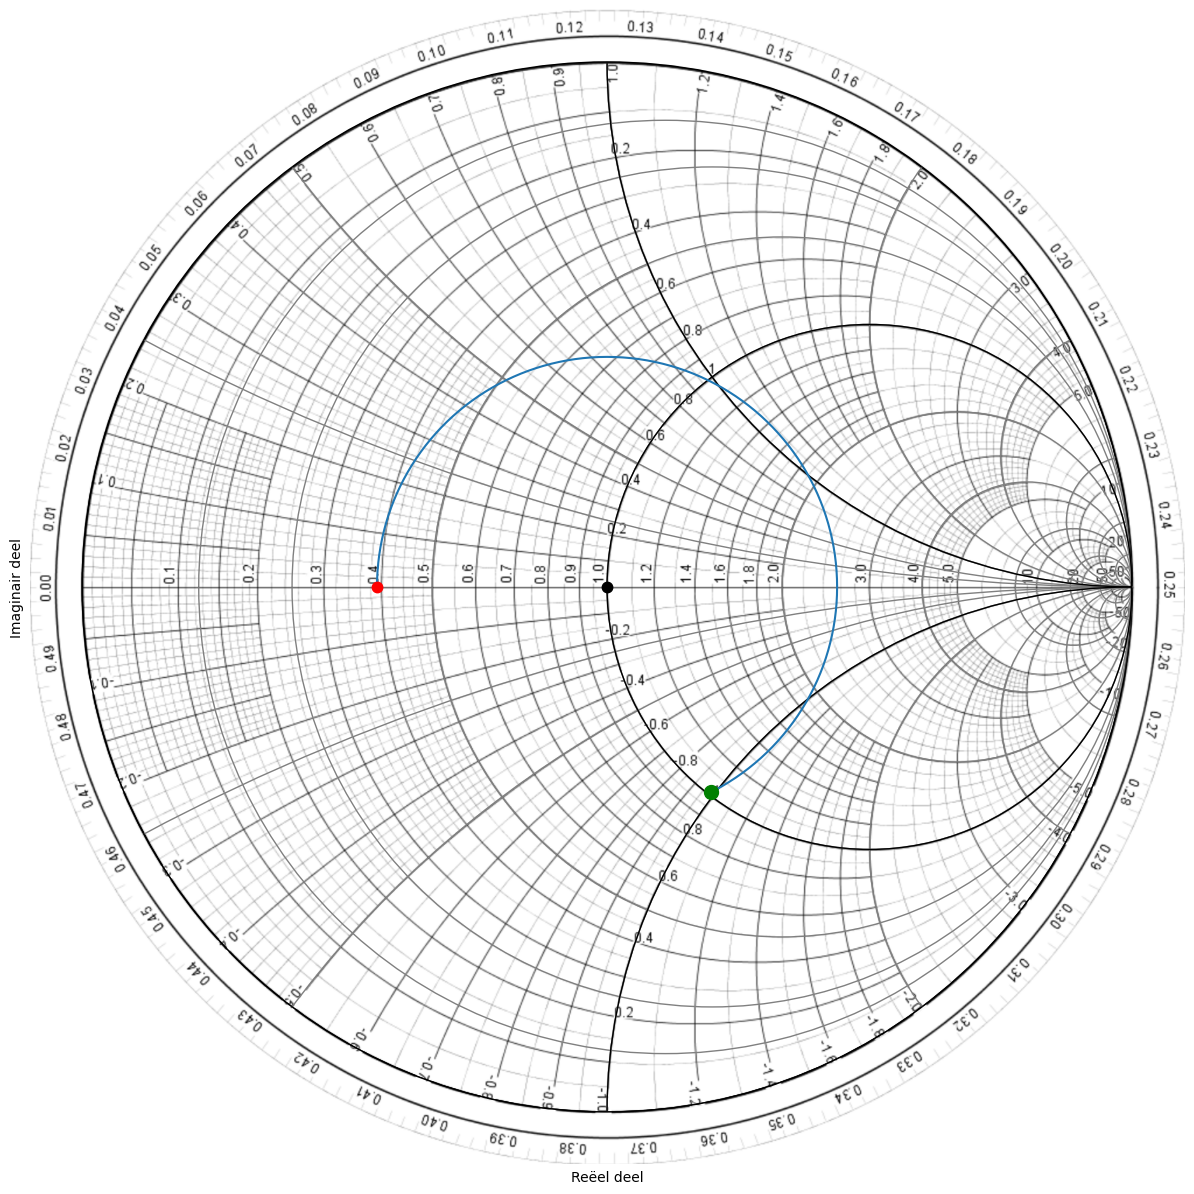

In [6]:
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,244)]
smitplot(ylijn,Y_0,show=True)

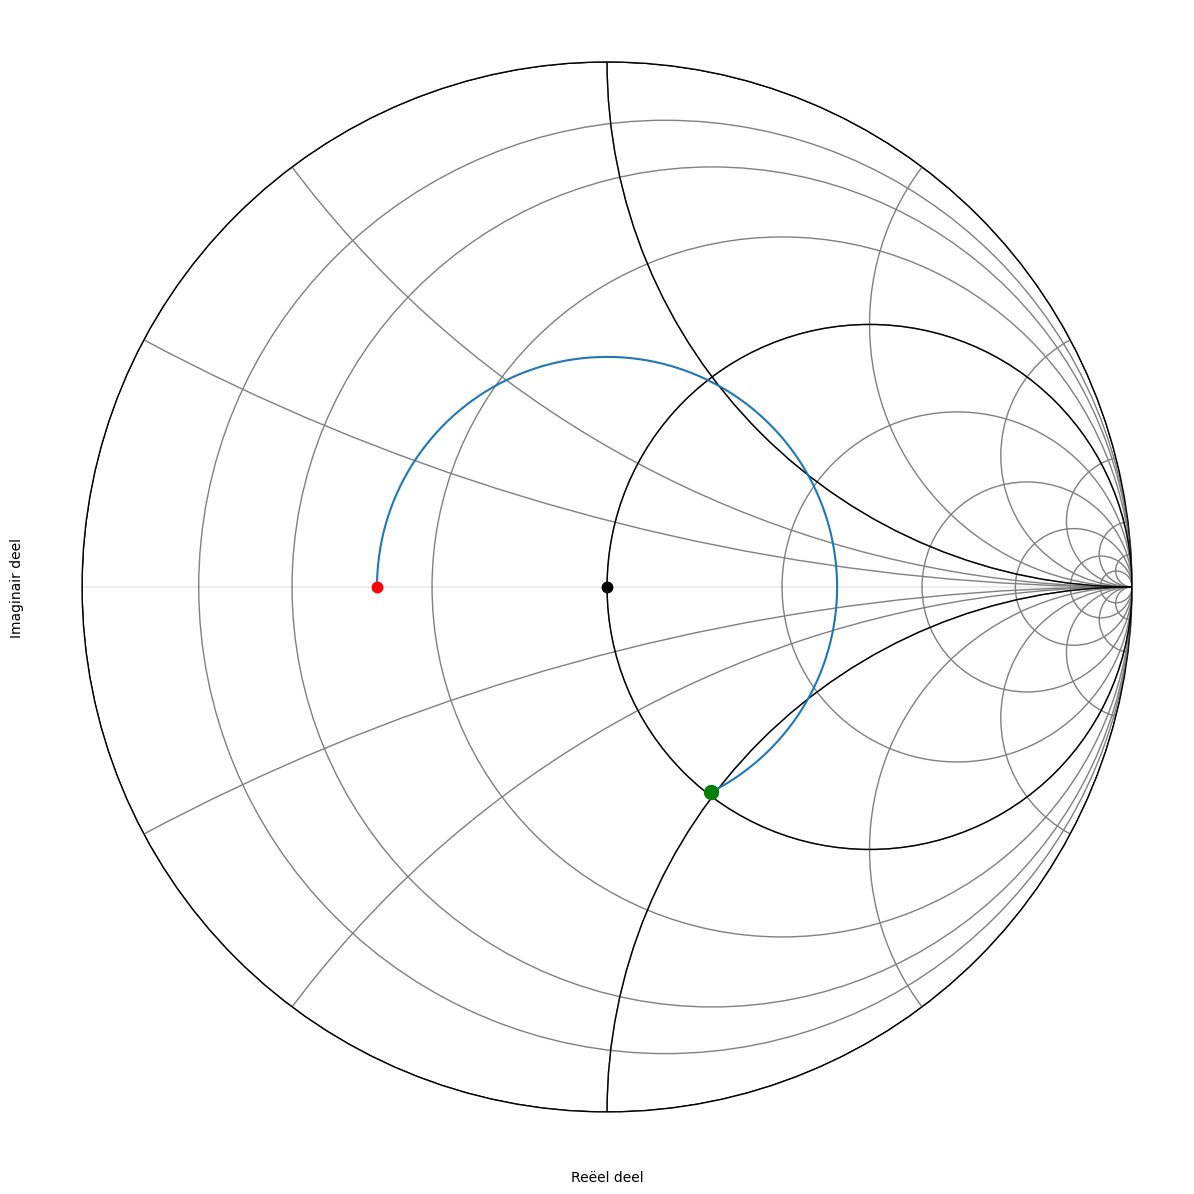

In [7]:
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,244)]
smitplot(ylijn,Y_0)

Manueel lezen we op de Smith kaart een waarde af van $ y \approx =1 + 1 j $. Als we dat dan herrekenen met de karakteristieke admittantie (20 mS) van de lijn bekomen we: Y= 20 mS +20 j mS.

Met de code kunnen we dat veel nauwkeuriger doen. De tabel hieronder geeft aan voor de verschillende hoeken op de cirkel wel waarde van de admittantie we bekomen.

In [8]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(242,247)]
def ylijnprint(ylijn,golflengte=12.5):
    print('hoek    admittantie (Siemens)     lengte coax (cm)')
    for i,yi in ylijn:
        print('{:4}    Y= {:-.2f}{:+.2f}j mS     lengte={:.2f} cm'.format(i,yi.real*1000,yi.imag*1000, i/360*golflengte/2))
ylijnprint(ylijn)

hoek    admittantie (Siemens)     lengte coax (cm)
 242    Y= 20.70-19.83j mS     lengte=4.20 cm
 243    Y= 20.35-19.67j mS     lengte=4.22 cm
 244    Y= 20.00-19.50j mS     lengte=4.24 cm
 245    Y= 19.67-19.33j mS     lengte=4.25 cm
 246    Y= 19.34-19.16j mS     lengte=4.27 cm


In [ ]:
0.019501786133142164/2/np.pi/1.2e9

De admittantie ter hoogte van waar we de condensator willen bijplaatsen is dus: 20.00-19.50j mS 

Om op 20 mS uit te komen tellen we hierbij 19.50j mS op



De nodige condensator is dus:

$$ j \omega C= 0.0195 j $$

$$ C =\frac{0.0195}{2 \pi \cdot 1.2 \times 10^9}=  2.59 pF $$

In [ ]:
244/360*12.5/2

De lengte van de coax tussen de capaciteit en de belasting wordt:

$$\frac{244}{360}\frac{\lambda}{2}= \frac{244}{360}\frac{12.5}{2}= 4.24 cm$$

<p class="alert alert-success">
De optimale condensatorwaarde in parallel wordt dus  2.59 pF en de lengte van de transmissielijn tussen de antenne en deze capaciteit is gelijk aan 4.24 cm
</p>

Het schema dat we nodig hebben om deze oplossing te realiseren wordt dus:

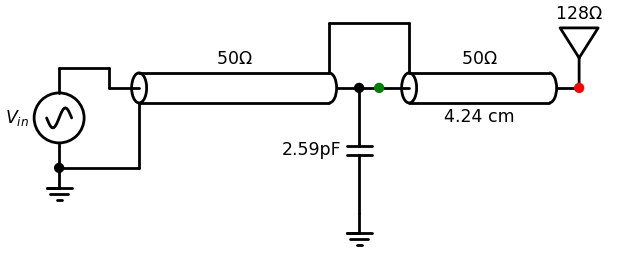

In [11]:
with schemdraw.Drawing() as d:
    d += Ground()
    d += Dot()
    d += (bron := SourceSin(l=2.0,d='up', label=r'$V_{in}$'))
    d += Line(l=1,d='right') 
    d += Line(l=0.4,d='down') 
    d += (coax1 := Coax(d='right',length=5, label=r'$50\Omega$'))
    d += Dot()
    d += Capacitor(l=2.5,d='down', label='2.59pF')
    d += Ground()
    d += Line(l=0.4,d='right',xy=coax1.end)
    d += Dot(color='g')
    d += (coax2 := Coax(d='right',l=1.5,length=4, label=r'$50\Omega$', botlabel='4.24 cm'))
    d += Dot(color='r')
    d += Antenna( label=r'$128\Omega$')
    d += Line(xy=coax1.shieldend_top,l=1,d='up')
    d += Line(tox=coax2.shieldstart_top,d='right')
    d += Line(toy=coax2.shieldstart_top,d='down')
    d += Line(xy=bron.start,tox=coax1.shieldstart,d='right')
    d += Line(toy=coax1.shieldstart,d='up')

### deel B: Spanning aan de voet van de antenne

Aangezien we een perfecte aanpassing hebben uitgevoerd, wordt het volledige vermogen dat op de kabel gestuurd wordt ook bekomen op de antenne. Derhalve kunnen we schrijven:

$$ P_{in}= \frac{V_L^2}{2 R_L}  $$

Waarbij $P_{in}$ het vermogen is dat naar de antenne gestuurd wordt (250 mW), $V_L$ de amplitude van de spanning op de antenne en $R_L$ de impedantie van de antenne, i.e. 128$\Omega$. 
Hieruit volgt dat de amplitude van de spanning die op de antenne bekomen wordt gelijk is aan 8 V.

In [ ]:
np.sqrt(2*128*0.25)

### deel C: Maximale spanning op het gedeelte van de kabel voor de aansluiting van de condensator 

De spanningsamplitude $V_a$ op de kabel kunnen we afleiden uit he vermogen en de karakteristieke impedantie $Z_o$:

$$ P_{in}= \frac{V_a^2}{2 Z_o}  $$

Hieruit volgt dat de amplitude op de kabel gelijk is aan 5 V.

In [ ]:
np.sqrt(2*50*0.25)

<div class="alert alert-success">
Dit laat ons toe vast te stellen dat de spanningsamplitude als gevolg van de aanpassing gaat stijgen van 5 V (normaal op de lijn) naar 8V ter hoogte van de aanpassing.
Het omgekeerde gebeurt echter met de stroomamplitude: deze daalt van 100 mA op de lijn, naar 62,5 mA in de antenne.
</div>

In [ ]:
8/128

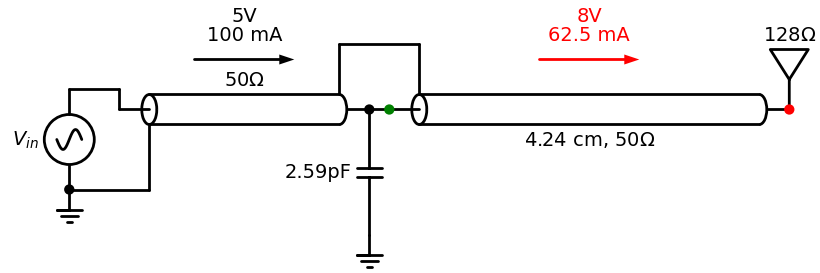

In [11]:
with schemdraw.Drawing() as d:
    d += Ground()
    d += Dot()
    d += (bron := SourceSin(l=2.0,d='up', label=r'$V_{in}$'))
    d += Line(l=1,d='right') 
    d += Line(l=0.4,d='down') 
    d += (coax1 := Coax(d='right',length=5, label=r'$50\Omega$'))
    d += CurrentLabel(ofst=0.7).at(coax1).label('5V\n100 mA')
    d += Dot(xy=coax1.end)
    d += Capacitor(l=2.5,d='down', label='2.59pF')
    d += Ground()
    d += Line(l=0.4,d='right',xy=coax1.end)
    d += Dot(color='g')
    d += (coax2 := Coax(d='right',l=1.5,length=8,botlabel=r'4.24 cm, $50\Omega$'))
    d += CurrentLabel(ofst=0.7).at(coax2).label('8V\n62.5 mA').color('red')
    d += Dot(color='r')
    d += Antenna( label=r'$128\Omega$')
    d += Line(xy=coax1.shieldend_top,l=1,d='up')
    d += Line(tox=coax2.shieldstart_top,d='right')
    d += Line(toy=coax2.shieldstart_top,d='down')
    d += Line(xy=bron.start,tox=coax1.shieldstart,d='right')
    d += Line(toy=coax1.shieldstart,d='up')